In [224]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings('ignore')


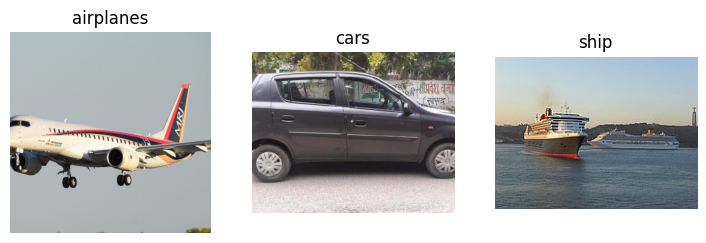

In [225]:
data_path = "data/train"
test_path = "data/test"

image_categories = os.listdir('data/train')

def plot_images(image_categories):
    
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        image_path = data_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)

In [226]:
model = Sequential()
model.add(
    Conv2D( 
        filters=8, 
        kernel_size=(3, 3), 
        activation='relu', 
        input_shape=(210, 140, 3) 
    ))

model.add(
    MaxPooling2D( 
        pool_size=(2, 2) 
    ))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) 

model.add(Flatten()) 
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

model.summary()

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'] 
)


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 208, 138, 8)       224       
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 104, 69, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 102, 67, 16)       1168      
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 51, 33, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_89 (Conv2D)          (None, 49, 31, 16)        2320      
                                                                 
 flatten_29 (Flatten)        (None, 24304)           

In [227]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True 
)

test_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split = 0.2 
)

train_generator = train_datagen.flow_from_directory(
    data_path, 
    target_size=(210, 140), 
    batch_size = 32, 
    subset='training', 
    class_mode='categorical' 
)

validation_generator = test_datagen.flow_from_directory(
    data_path,
    target_size=(210, 140),
    batch_size=32,
    subset='validation', 
    class_mode='categorical'
)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [228]:
model.fit(
    train_generator, 
    epochs=17, 
    validation_data=validation_generator 
)

Epoch 1/17
94/94 [==============================] - 36s 373ms/step - loss: 0.8878 - accuracy: 0.5530 - val_loss: 0.8715 - val_accuracy: 0.5517
Epoch 2/17
94/94 [==============================] - 35s 376ms/step - loss: 0.7132 - accuracy: 0.6697 - val_loss: 0.6077 - val_accuracy: 0.7600
Epoch 3/17
94/94 [==============================] - 38s 401ms/step - loss: 0.6314 - accuracy: 0.7320 - val_loss: 0.5442 - val_accuracy: 0.7817
Epoch 4/17
94/94 [==============================] - 38s 408ms/step - loss: 0.5513 - accuracy: 0.7967 - val_loss: 0.4885 - val_accuracy: 0.7933
Epoch 5/17
94/94 [==============================] - 39s 417ms/step - loss: 0.4575 - accuracy: 0.8347 - val_loss: 0.3396 - val_accuracy: 0.8583
Epoch 6/17
94/94 [==============================] - 38s 410ms/step - loss: 0.3927 - accuracy: 0.8617 - val_loss: 0.3535 - val_accuracy: 0.8600
Epoch 7/17
94/94 [==============================] - 39s 410ms/step - loss: 0.3935 - accuracy: 0.8553 - val_loss: 0.5813 - val_accuracy: 0.7583

In [229]:
model.save('models/m.h5') 

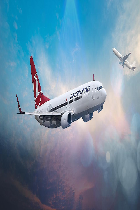

In [230]:
from tensorflow.keras.models import load_model
model = load_model('models/m.h5') 

import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('airplane.jpg', target_size=(210, 140))
test_image

In [231]:
test_image = image.img_to_array(test_image) 
print(test_image.shape)
print(test_image)

(210, 140, 3)
[[[ 27. 123. 165.]
  [ 23. 122. 163.]
  [ 16. 124. 170.]
  ...
  [152. 176. 186.]
  [151. 179. 183.]
  [159. 179. 186.]]

 [[ 29. 125. 167.]
  [ 26. 125. 166.]
  [ 19. 126. 170.]
  ...
  [152. 176. 186.]
  [151. 179. 183.]
  [158. 178. 185.]]

 [[ 28. 124. 166.]
  [ 26. 125. 166.]
  [ 21. 127. 169.]
  ...
  [152. 176. 186.]
  [151. 179. 183.]
  [157. 177. 184.]]

 ...

 [[ 30.  34.  45.]
  [ 31.  35.  46.]
  [ 31.  35.  46.]
  ...
  [ 47.  56.  73.]
  [ 46.  55.  72.]
  [ 44.  53.  70.]]

 [[ 30.  34.  45.]
  [ 30.  34.  45.]
  [ 30.  34.  45.]
  ...
  [ 46.  55.  72.]
  [ 46.  55.  72.]
  [ 45.  54.  71.]]

 [[ 30.  34.  45.]
  [ 30.  34.  45.]
  [ 30.  34.  45.]
  ...
  [ 46.  55.  72.]
  [ 46.  55.  72.]
  [ 45.  54.  71.]]]


In [232]:
test_image = np.expand_dims(test_image, axis=0) / 255.0 
print(test_image.shape)

(1, 210, 140, 3)


In [233]:
result = model.predict(test_image) 

airplane_probability = result[0][0]
car_probability = result[0][1]
ship_probability = result[0][2]

max_probability = max(airplane_probability, car_probability, ship_probability)

if max_probability == airplane_probability:
    print('Airplane')
elif max_probability == car_probability:
    print('Car')
else:
    print('Ship')


1/1 [==============================] - 0s 63ms/step
Ship
